# Libraries

In [15]:
# Packages for dataframe operations
import numpy as np 
import pandas as pd
# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [16]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

#stopwords
from nltk.corpus import stopwords

# Data

### Import Data

In [17]:
df = pd.read_csv('data.csv') 

In [18]:
#Data Cleaning
#Delete a column not needed 
df.reset_index(drop=True)
del df['Unnamed: 0']

In [19]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [20]:
# fill the NA with -1
df.fillna(-1,inplace=True)

In [21]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')

In [22]:
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


## Group Data by Sector (HealthCare and IT)

In [23]:
groups = df.groupby(df.Sector)

df.health = groups.get_group("Health Care")
df.it=groups.get_group("Information Technology")

C:\Users\Pc\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pc\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [24]:
df.health.Job_Description

1       Overview\n\nProvides analytical and technical ...
10      NYU Grossman School of Medicine is one of the ...
12      Job Summary:\n\nThe Clinical Research Data Ana...
27      About Ro\nFounded in 2017, Ro is a patient-dri...
38      NYU Grossman School of Medicine is one of the ...
                              ...                        
2198    Job Description\nRxRevu is hiring a mid-level ...
2215    Summary\n\nThe Data Analyst will be responsibl...
2218    This senior individual contributor is primaril...
2236    Senior Health Data Analyst (SAS)\n\nTelligen i...
2252    You.\n\nYou bring your body, mind, heart and s...
Name: Job_Description, Length: 151, dtype: object

In [25]:
df.it.Job_Description

2       We’re looking for a Senior Data Analyst who ha...
3       Requisition NumberRR-0001939\nRemote:Yes\nWe c...
19      About Us\n\nAt Teachers Pay Teachers (TpT), we...
20      Note: By applying to this position your applic...
26      We are building Duolingo's newly formed FP&A /...
                              ...                        
2226    Job Description\nJob description\nInterpret da...
2237    Company Description\n\nClientSolv Technologies...
2238    Amyx is seeking to hire a Senior Contract Data...
2247    Job Description\nJob Title: Marketing/Communic...
2251    Summary\n\nResponsible for working cross-funct...
Name: Job_Description, Length: 570, dtype: object

## Clean the data

In [26]:
# Remove Emails
data1 = [re.sub('\S*@\S*\s?', '', sent) for sent in df.health.Job_Description]

# Remove new line characters
data1 = [re.sub('\s+', ' ', sent) for sent in df.health.Job_Description]

# Remove distracting single quotes
data1 = [re.sub("\'", "", sent) for sent in df.health.Job_Description]

# Remove distracting ""\n" quotes
#data = [re.sub("\n", "", sent) for sent in df.Job_Description]
pprint(data1[:1])

['Overview\n'
 '\n'
 'Provides analytical and technical support for the integration of multiple '
 'data sources used to prepare internal and external reporting for the Quality '
 'Management team and business stakeholders. Provides support and analytical '
 'insight for Quality Incentive measures, HEDIS measures, and Quality '
 'Improvement initiatives. Monitors, analyzes, and communicates Quality '
 'performance related to benchmarks. Collaborates with clinical and '
 'operational teams within Quality Management, as well as with CHOICE Clinical '
 'Operations and Business Intelligence & Analytics (BIA). Participates in data '
 'validation of current reporting and dashboards. Monitors data integrity of '
 'databases and provides recommendation accordingly. Participates in the '
 'development of internal dashboards and databases. Works under general '
 'direction.\n'
 '\n'
 'Responsibilities\n'
 'Provides support and analytical insight for Quality Incentive measures, '
 'HEDIS measures

In [27]:
# Remove Emails
data2 = [re.sub('\S*@\S*\s?', '', sent) for sent in df.it.Job_Description]

# Remove new line characters
data2 = [re.sub('\s+', ' ', sent) for sent in df.it.Job_Description]

# Remove distracting single quotes
data2 = [re.sub("\'", "", sent) for sent in df.it.Job_Description]

# Remove distracting ""\n" quotes
#data = [re.sub("\n", "", sent) for sent in df.Job_Description]

In [29]:
#tokenized words
def sent_to_words1(sentences1):
    for sentences in sentences1:
        yield(gensim.utils.simple_preprocess(str(sentences), deacc=True))  # deacc=True removes punctuations

data_words1 = list(sent_to_words1(data1))

print(data_words1[:1])

[['overview', 'provides', 'analytical', 'and', 'technical', 'support', 'for', 'the', 'integration', 'of', 'multiple', 'data', 'sources', 'used', 'to', 'prepare', 'internal', 'and', 'external', 'reporting', 'for', 'the', 'quality', 'management', 'team', 'and', 'business', 'stakeholders', 'provides', 'support', 'and', 'analytical', 'insight', 'for', 'quality', 'incentive', 'measures', 'hedis', 'measures', 'and', 'quality', 'improvement', 'initiatives', 'monitors', 'analyzes', 'and', 'communicates', 'quality', 'performance', 'related', 'to', 'benchmarks', 'collaborates', 'with', 'clinical', 'and', 'operational', 'teams', 'within', 'quality', 'management', 'as', 'well', 'as', 'with', 'choice', 'clinical', 'operations', 'and', 'business', 'intelligence', 'analytics', 'bia', 'participates', 'in', 'data', 'validation', 'of', 'current', 'reporting', 'and', 'dashboards', 'monitors', 'data', 'integrity', 'of', 'databases', 'and', 'provides', 'recommendation', 'accordingly', 'participates', 'in',

In [30]:
def sent_to_words2(sentences12):
    for sentences1 in sentences12:
        yield(gensim.utils.simple_preprocess(str(sentences1), deacc=True))  # deacc=True removes punctuations

data_words2 = list(sent_to_words2(data2))

print(data_words2[:1])

[['we', 're', 'looking', 'for', 'senior', 'data', 'analyst', 'who', 'has', 'love', 'of', 'mentorship', 'data', 'visualization', 'and', 'generating', 'actionable', 'insights', 'from', 'raw', 'data', 'in', 'this', 'role', 'you', 'll', 'have', 'the', 'opportunity', 'to', 'be', 'an', 'organizational', 'influencer', 'who', 'will', 'generate', 'insights', 'with', 'good', 'degree', 'of', 'autonomy', 'and', 'partner', 'with', 'data', 'science', 'to', 'grow', 'deeper', 'analytical', 'skills', 'you', 'will', 'be', 'joining', 'the', 'insights', 'analytics', 'team', 'team', 'tasked', 'with', 'developing', 'insights', 'and', 'reporting', 'to', 'support', 'our', 'customers', 'and', 'advisors', 'needs', 'this', 'team', 'sits', 'within', 'the', 'customer', 'operations', 'team', 'but', 'is', 'also', 'connected', 'to', 'the', 'product', 'organization', 'in', 'this', 'role', 'you', 'will', 'work', 'mainly', 'with', 'customer', 'operations', 'stakeholders', 'to', 'set', 'kpis', 'and', 'evaluate', 'the', '

## Building models

In [31]:
# Build the bigram and trigram models
bigram1 = gensim.models.Phrases(data_words1, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram1 = gensim.models.Phrases(bigram1[data_words1], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod1 = gensim.models.phrases.Phraser(bigram1)
trigram_mod1 = gensim.models.phrases.Phraser(trigram1)

# See trigram example
print(trigram_mod1[bigram_mod1[data_words1[0]]])

['overview', 'provides', 'analytical', 'and', 'technical', 'support', 'for', 'the', 'integration', 'of', 'multiple', 'data', 'sources', 'used', 'to', 'prepare', 'internal', 'and', 'external', 'reporting', 'for', 'the', 'quality', 'management', 'team', 'and', 'business', 'stakeholders', 'provides', 'support', 'and', 'analytical', 'insight', 'for', 'quality', 'incentive', 'measures', 'hedis', 'measures', 'and', 'quality', 'improvement', 'initiatives', 'monitors', 'analyzes', 'and', 'communicates', 'quality', 'performance', 'related', 'to', 'benchmarks', 'collaborates', 'with', 'clinical', 'and', 'operational', 'teams', 'within', 'quality', 'management', 'as', 'well', 'as', 'with', 'choice', 'clinical', 'operations', 'and', 'business', 'intelligence', 'analytics', 'bia', 'participates', 'in', 'data', 'validation', 'of', 'current', 'reporting', 'and', 'dashboards', 'monitors', 'data', 'integrity', 'of', 'databases', 'and', 'provides', 'recommendation', 'accordingly', 'participates', 'in', 

In [32]:
# Build the bigram and trigram models
bigram2 = gensim.models.Phrases(data_words2, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram2 = gensim.models.Phrases(bigram2[data_words2], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod2 = gensim.models.phrases.Phraser(bigram2)
trigram_mod2 = gensim.models.phrases.Phraser(trigram2)

# See trigram example
print(trigram_mod2[bigram_mod2[data_words2[0]]])

['we', 're', 'looking', 'for', 'senior', 'data', 'analyst', 'who', 'has', 'love', 'of', 'mentorship', 'data', 'visualization', 'and', 'generating', 'actionable', 'insights', 'from', 'raw', 'data', 'in', 'this', 'role', 'you', 'll', 'have', 'the', 'opportunity', 'to', 'be', 'an', 'organizational', 'influencer', 'who', 'will', 'generate', 'insights', 'with', 'good', 'degree', 'of', 'autonomy', 'and', 'partner', 'with', 'data', 'science', 'to', 'grow', 'deeper', 'analytical', 'skills', 'you', 'will', 'be', 'joining', 'the', 'insights', 'analytics', 'team', 'team', 'tasked', 'with', 'developing', 'insights', 'and', 'reporting', 'to', 'support', 'our', 'customers', 'and', 'advisors', 'needs', 'this', 'team', 'sits', 'within', 'the', 'customer', 'operations', 'team', 'but', 'is', 'also', 'connected', 'to', 'the', 'product', 'organization', 'in', 'this', 'role', 'you', 'will', 'work', 'mainly', 'with', 'customer', 'operations', 'stakeholders', 'to', 'set', 'kpis', 'and', 'evaluate', 'the', 'e

# Stopwords

## Define Stopwords

In [33]:
stop_words = stopwords.words('english')
e= ['from', 'subject', 're', 'edu', 'use', 'data', 'data analyst', 'experience', 'business',
                  'analyst', 'role', 'position', 'function', 'application', 'recruit', 'recruitment', 'skill',
                  'work', 'applicant', 'job', 'email', 'send', 'resume', 'phone', 'cover_letter', 'apply', 'day', 'looking',
                  'hire', 'comply', 'athena', 'aws', 'glue', 'kafka', 'red', 'linkedin', 'kinesis', 'ntt', 'opportunity',
                  'gene', 'requirement', 'skill', 'really', 'relate', 'progressive', 'report', 'analyze', 'redshit',
                  'help', 'drive', 'apis', 'curate', 'capgemini', 'test', 'mountain', 'tortoise', 'information', 'use',
                  'strong', 'technique', 'lp', 'criterio', 'interpretation', 'brink', 'edge', 'require', 'tachyon',
                  'edition', 'snow', 'flake', 'pick', 'capital', 'rush', 'exam', 'benefit','include', 'year', 'vital',
                  'need', 'ensure', 'demonstrate', 'analysis', 'quality', 'knowledge', 'solution',
                  'user', 'announcement', 'applicant', 'lender', 'employment', 'applicant', 'provide', 'process',
                  'colleague', 'statement','mirror', 'relate', 're', 'status', 'duty', 'report', 'ability', 'require',
                  'project', 'transcript', 'university', 'study', 'advantageous', 'collection', 'procedure', 
                   'replication', 'mirror', 'bull', 'well', 'make', 'analysr', 'technique', 'package', 'status']

stop_words.extend(e)

## remove them

In [34]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords1(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams1(texts):
    return [bigram_mod1[doc] for doc in texts]

def make_trigrams1(texts):
    return [trigram_mod1[bigram_mod1[doc]] for doc in texts]

def lemmatization1(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [35]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords2(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams2(texts):
    return [bigram_mod1[doc] for doc in texts]

def make_trigrams2(texts):
    return [trigram_mod1[bigram_mod1[doc]] for doc in texts]

def lemmatization2(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [38]:
from nltk.stem import WordNetLemmatizer
# Remove Stop Words
data_words_nostops1 = remove_stopwords1(data_words1)

# Form Bigrams
data_words_bigrams1 = make_bigrams1(data_words_nostops1)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load("en_core_web_lg", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized1 = lemmatization1(data_words_bigrams1, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized1[:1])

[['overview', 'provide', 'analytical', 'technical', 'support', 'integration', 'multiple', 'source', 'use', 'prepare', 'internal', 'external', 'reporting', 'management', 'team', 'stakeholder', 'provide', 'support', 'analytical', 'insight', 'incentive', 'measure', 'hedi', 'measure', 'improvement', 'initiative', 'monitor', 'analyze', 'communicate', 'performance', 'relate', 'benchmark', 'collaborate', 'clinical', 'operational', 'team', 'management', 'choice', 'clinical', 'operation', 'intelligence', 'analytic', 'bia', 'participate', 'validation', 'current', 'reporting', 'dashboard', 'monitor', 'integrity', 'database', 'provide', 'recommendation', 'accordingly', 'participate', 'development', 'internal', 'dashboard', 'database', 'work', 'general', 'direction', 'provide', 'support', 'analytical', 'insight', 'incentive', 'measure', 'hedi', 'measure', 'improvement', 'initiative', 'monitor', 'internal', 'performance', 'benchmark', 'participate', 'identification', 'development', 'management', 'mo

In [39]:
# Remove Stop Words
data_words_nostops2 = remove_stopwords2(data_words2)

# Form Bigrams
data_words_bigrams2 = make_bigrams2(data_words_nostops2)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load("en_core_web_lg", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized2 = lemmatization2(data_words_bigrams2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized2[:1])

[['senior', 'love', 'mentorship', 'visualization', 'generate', 'actionable', 'insight', 'raw', 'organizational', 'influencer', 'generate', 'insight', 'good', 'degree', 'autonomy', 'partner', 'science', 'grow', 'deep', 'analytical', 'skill', 'join', 'insight', 'analytic', 'team', 'team', 'task', 'develop', 'insight', 'report', 'support', 'customer', 'advisor', 'need', 'team', 'sit', 'customer', 'operation', 'team', 'also', 'connect', 'product', 'organization', 'mainly', 'customer', 'operation', 'stakeholder', 'set', 'kpi', 'evaluate', 'effectiveness', 'current', 'strategy', 'workflow', 'involve', 'many', 'aspect', 'operation', 'auditing', 'building', 'dashboard', 'analytical', 'insight', 'example', 'review', 'code', 'junior', 'analyst', 'organize', 'code', 'workshop', 'build', 'metric', 'evaluate', 'performance', 'advisor', 'eliminate', 'confounding', 'variable', 'create', 'weight', 'measure', 'account', 'individual', 'success', 'define', 'metric', 'create', 'dashboard', 'track', 'succe

# Dictionary

In [40]:
# Create Dictionary
id2word1 = corpora.Dictionary(data_lemmatized1)

# Create Corpus
texts1 = data_lemmatized1

# Term Document Frequency
corpus1 = [id2word1.doc2bow(texts) for texts in texts1]

# View
print(corpus1[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 2), (10, 3), (11, 5), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 3), (23, 1), (24, 5), (25, 1), (26, 2), (27, 1), (28, 3), (29, 2), (30, 3), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 3), (37, 1), (38, 3), (39, 1), (40, 2), (41, 4), (42, 5), (43, 1), (44, 1), (45, 2), (46, 1), (47, 2), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 3), (62, 1), (63, 1), (64, 4), (65, 2), (66, 1), (67, 1), (68, 1), (69, 3), (70, 3), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 2), (77, 3), (78, 2), (79, 8), (80, 1), (81, 3), (82, 2), (83, 1), (84, 1), (85, 3), (86, 2), (87, 1), (88, 1), (89, 1), (90, 2), (91, 4), (92, 1), (93, 3), (94, 1), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 7), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 4), (107, 1), (108, 1), (109, 1), (110, 1)

In [41]:
# Create Dictionary
id2word2 = corpora.Dictionary(data_lemmatized2)

# Create Corpus
texts2 = data_lemmatized2

# Term Document Frequency
corpus2= [id2word2.doc2bow(texts1) for texts1 in texts2]

# View
print(corpus2[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 3), (5, 1), (6, 3), (7, 2), (8, 1), (9, 5), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 3), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 3), (47, 9), (48, 3), (49, 1), (50, 1), (51, 2), (52, 1), (53, 2), (54, 1), (55, 3), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 3), (75, 1), (76, 2), (77, 3), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 3), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 3), (101, 2), (102, 1), (103, 8), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [42]:
# Human readable format of corpus (term-frequency)
[[(id2word1[id], freq) for id, freq in cp] for cp in corpus1[:1]]

[[('access', 2),
  ('accomplish', 1),
  ('accordingly', 1),
  ('accuracy', 1),
  ('accurate', 1),
  ('act', 1),
  ('action', 2),
  ('advanced', 1),
  ('analysis', 2),
  ('analytic', 2),
  ('analytical', 3),
  ('analyze', 5),
  ('application', 2),
  ('appropriateness', 1),
  ('approve', 1),
  ('area', 1),
  ('assessor', 1),
  ('assist', 1),
  ('audience', 1),
  ('automate', 1),
  ('base', 2),
  ('benchmark', 2),
  ('bia', 3),
  ('bio', 1),
  ('care', 5),
  ('change', 1),
  ('choice', 2),
  ('claim', 1),
  ('clinical', 3),
  ('collaborate', 2),
  ('communicate', 3),
  ('communication', 1),
  ('compile', 1),
  ('complex', 2),
  ('computer', 1),
  ('concentration', 1),
  ('conduct', 3),
  ('coordinate', 1),
  ('correct', 3),
  ('corrective', 1),
  ('current', 2),
  ('dashboard', 4),
  ('database', 5),
  ('department', 1),
  ('departmental', 1),
  ('design', 2),
  ('determine', 1),
  ('develop', 2),
  ('development', 2),
  ('direction', 1),
  ('discrepancy', 1),
  ('draft', 1),
  ('duty', 1

In [43]:
# Human readable format of corpus (term-frequency)
[[(id2word2[id], freq) for id, freq in cp] for cp in corpus2[:1]]

[[('account', 1),
  ('act', 1),
  ('actionable', 2),
  ('advanced', 1),
  ('advisor', 3),
  ('age', 1),
  ('also', 3),
  ('analysis', 2),
  ('analyst', 1),
  ('analytic', 5),
  ('analytical', 3),
  ('ancestry', 1),
  ('anyway', 1),
  ('artist', 1),
  ('aspect', 1),
  ('auditing', 1),
  ('autonomy', 1),
  ('bachelor_degree', 1),
  ('base', 2),
  ('beautiful', 1),
  ('bi', 1),
  ('blend', 1),
  ('bot', 1),
  ('broad', 1),
  ('build', 1),
  ('building', 1),
  ('business', 1),
  ('care', 1),
  ('celebrate', 1),
  ('chatbot', 1),
  ('citizenship', 1),
  ('city', 1),
  ('cleaning', 1),
  ('clear', 1),
  ('clearly', 1),
  ('code', 3),
  ('collaborate', 2),
  ('com', 1),
  ('commit', 1),
  ('communicate', 1),
  ('confounding', 1),
  ('connect', 1),
  ('create', 2),
  ('creative', 1),
  ('culture', 1),
  ('curiosity', 1),
  ('current', 3),
  ('customer', 9),
  ('dashboard', 3),
  ('dashboarding', 1),
  ('dataset', 1),
  ('deep', 2),
  ('define', 1),
  ('degree', 2),
  ('demand', 1),
  ('design'

# LDA models

In [44]:
# Build LDA model
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus1,
                                           id2word=id2word1,
                                           num_topics=11, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [45]:
# Build LDA model
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=11, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [46]:
# Print the Keyword in the 10 topics
pprint(lda_model1.print_topics())
doc_lda1 = lda_model1[corpus1]

[(0,
  '0.015*"healthcare" + 0.014*"support" + 0.011*"skill" + 0.010*"team" + '
  '0.010*"financial" + 0.009*"analytical" + 0.009*"include" + 0.009*"sql" + '
  '0.009*"care" + 0.009*"analytic"'),
 (1,
  '0.022*"billing" + 0.016*"dna" + 0.008*"bill" + 0.008*"metroplus" + '
  '0.006*"ambassador" + 0.006*"yorker" + 0.004*"adhoc" + 0.004*"qa" + '
  '0.004*"collection" + 0.004*"production"'),
 (2,
  '0.007*"envision" + 0.003*"divisional" + 0.002*"lean" + 0.002*"dhs" + '
  '0.002*"establishment" + 0.002*"anesthesia" + 0.002*"confirm" + '
  '0.002*"ready" + 0.002*"supplemental" + 0.002*"district"'),
 (3,
  '0.022*"research" + 0.018*"health" + 0.011*"skill" + 0.010*"statistical" + '
  '0.009*"report" + 0.008*"database" + 0.007*"include" + 0.007*"project" + '
  '0.007*"clinical" + 0.006*"staff"'),
 (4,
  '0.005*"montefiore" + 0.004*"tarrytown" + 0.004*"yr" + 0.002*"attn" + '
  '0.002*"broadway" + 0.002*"cv" + 0.002*"indicator" + 0.002*"exp" + '
  '0.002*"acceptable" + 0.000*"li"'),
 (5,
  '0.00

In [47]:
# Print the Keyword in the 10 topics
pprint(lda_model2.print_topics())
doc_lda2 = lda_model2[corpus2]

[(0,
  '0.003*"slicer" + 0.002*"bullability" + 0.002*"bullknowledge" + '
  '0.002*"jersey" + 0.001*"bullstrong" + 0.001*"strategize" + '
  '0.001*"refinement" + 0.001*"bullassiste" + 0.001*"bullrefine" + '
  '0.001*"bullensure"'),
 (1,
  '0.021*"apple" + 0.017*"metadata" + 0.016*"com" + 0.014*"technical" + '
  '0.013*"informatica" + 0.013*"middot" + 0.013*"location" + 0.012*"big" + '
  '0.011*"warehouse" + 0.010*"good"'),
 (2,
  '0.020*"security" + 0.018*"system" + 0.015*"year" + 0.013*"support" + '
  '0.012*"federal" + 0.011*"technical" + 0.010*"microsoft" + 0.009*"service" + '
  '0.009*"require" + 0.008*"least"'),
 (3,
  '0.041*"oracle" + 0.020*"sql" + 0.017*"year" + 0.016*"diverse" + '
  '0.014*"teradata" + 0.014*"sql_server" + 0.011*"basis" + 0.010*"function" + '
  '0.010*"correspond" + 0.009*"receive"'),
 (4,
  '0.026*"streaming" + 0.023*"disney" + 0.018*"fraud" + 0.016*"medium" + '
  '0.012*"consumer" + 0.008*"prevention" + 0.006*"fresh" + 0.005*"intuit" + '
  '0.004*"beloved" + 

# Perplecity and Coherence Score

In [48]:
# Compute Perplexity
print('\nPerplexity: ', lda_model1.log_perplexity(corpus1))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda1 = CoherenceModel(model=lda_model1, texts=data_lemmatized1, dictionary=id2word1, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
print('\nCoherence Score: ', coherence_lda1)


Perplexity:  -7.34961647930304

Coherence Score:  0.33607443231125483


In [49]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus2))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=data_lemmatized2, dictionary=id2word2, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Perplexity:  -7.670216382756537

Coherence Score:  0.39440545655975806


# Word Cloud Visualisations

In [50]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

## Health care 

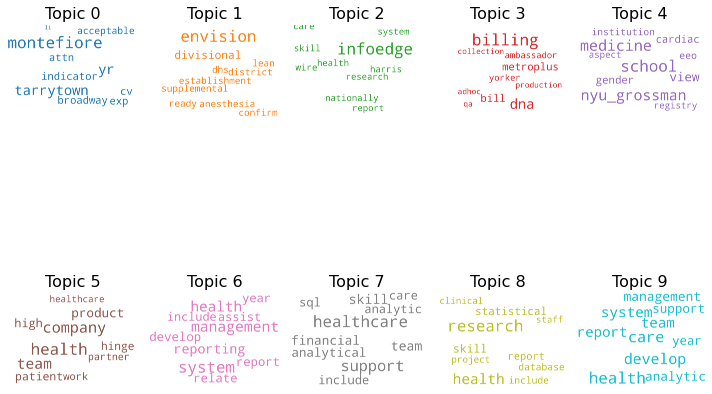

In [51]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model1.show_topics(formatted=False)

fig, axes = plt.subplots(2,5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


## IT

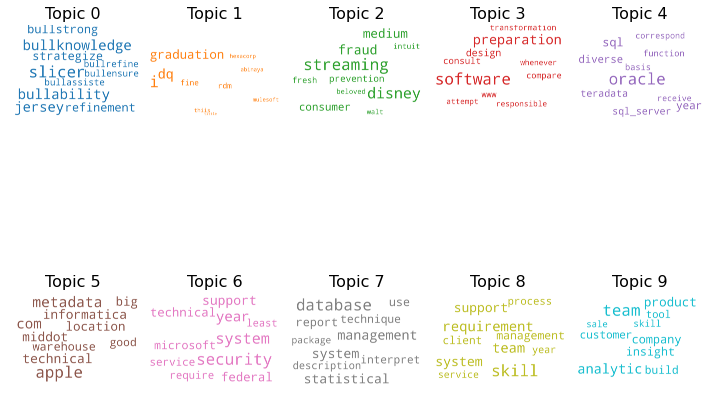

In [52]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model2.show_topics(formatted=False)

fig, axes = plt.subplots(2,5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
